# 2016 VEST MI

### From Documentation:
Election results from the Michigan Department of State (https://miboecfr.nictusa.com/cgi-bin/cfr/precinct_srch.cgi)
Precinct shapefile from the Michigan Department of State (https://gis-michigan.opendata.arcgis.com/datasets/8ce0f3ce3ff74109ac02a26d34a0f4fc_1)

Michigan has cities split across counties. Two are relevant to their reported election results versus the precinct map (which did not make the split), Fenton and Richmond. Those precincts were merged to reflect the precinct map.

Most counties had "statistical adjustments" that were at the county level, rather than the precinct level. Only two were for party candidates (Huron and Kalkaka), and in those cases, two or fewer votes. The remaining cases were related to "other" votes. Due to the scattered nature of "other" votes, these votes are apportioned to precincts by the split of total votes of precincts within the county.

Detroit allows for absentee votes to be reported by Absentee Voter Counting Boards, which generally contain multiple precincts. These votes are apportioned to precincts by candidate in the same shares that the non-AVCB vote was split among precincts within a county. The linkage between election precinct and AVCB was provided by OpenElections via Derek Willis. Precinct 176 was listed as split between AVCB 37 and AVCB 158, the only precinct in the city that was listed as split. AVCB 158 has no other precinct assigned to it, so all votes went to precinct 176. However, this was a very low number of votes relative to the other AVCBs, so for ease of calculation, 176 was treated as a normal member of AVCB 37 in the disaggregation calculation described above.

G16PREDCli - Hillary Clinton (Democratic Party)
G16PRERTru - Donald J. Trump (Republican Party)
G16PREGSte - Jill Stein (Green Party)
G16PRELJoh - Gary Johnson (Libertarian Party)
G16PREOth - Other Candidates/Write-in Votes


**Files + Sources:** 

2016GEN.zip: Election precinct results from the Michigan Department of State (https://miboecfr.nictusa.com/cgi-bin/cfr/precinct_srch.cgi)

2016_Voting_Precincts-shp.zip: Precinct shapefile from the Michigan Department of State (https://gis-michigan.opendata.arcgis.com/datasets/8ce0f3ce3ff74109ac02a26d34a0f4fc_1)

mi_2016.zip: VEST final file (https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/NH5S2I/4KOZRU&version=46.0)

documentation_2016.txt: VEST's documentation on their 2016 work, all included, not just MI (https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/NH5S2I/A652IT&version=46.0)

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pathlib
import matplotlib.pyplot as plt
import maup
from zipfile import ZipFile

# Load Partner File

In [3]:
cd /Users/lilyfalk/sandbox/pdv-mi/vest-mi/vest_mi_2016_ar/

/Users/lilyfalk/sandbox/pdv-mi/vest-mi/vest_mi_2016_ar


In [4]:
gdfv = gpd.read_file('./raw-from-source/mi_2016/mi_2016.shp')
gdfv.head()

,VTD2016,Label,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,geometry
0,1632100000001,City of Dearborn,581,93,17,11,1,"POLYGON ((-83.14843 42.34469, -83.14861 42.343..."
1,1632100000002,City of Dearborn,560,95,23,9,3,"POLYGON ((-83.16029 42.34644, -83.16027 42.344..."
2,1632100000003,City of Dearborn,756,171,52,13,5,"POLYGON ((-83.16699 42.34247, -83.16815 42.342..."
3,1632100000004,City of Dearborn,406,70,17,8,1,"POLYGON ((-83.17687 42.34399, -83.17806 42.343..."
4,1632100000005,City of Dearborn,453,68,15,9,0,"POLYGON ((-83.18665 42.34561, -83.18657 42.343..."


# Shapefile

## Load, Project

In [5]:
shp = gpd.read_file('./raw-from-source/2016_Voting_Precincts/2016_Voting_Precincts.shp')
shp.head()

,OBJECTID,Id,VTD2016,CountyFips,Jurisdicti,ElectionYe,Label,ShapeSTAre,ShapeSTLen,geometry
0,1,3888,1632100000001,163,21000,2016,City of Dearborn,2.489738e+06,6846.254657,"POLYGON ((734740.564 203392.197, 734729.230 20..."
1,2,3889,1632100000002,163,21000,2016,City of Dearborn,1.058362e+06,4621.388992,"POLYGON ((733757.240 203553.421, 733767.280 20..."
2,3,3890,1632100000003,163,21000,2016,City of Dearborn,1.488846e+06,4909.715171,"POLYGON ((733220.680 203094.269, 733125.455 20..."
3,4,3891,1632100000004,163,21000,2016,City of Dearborn,1.187165e+06,4354.743602,"POLYGON ((732401.480 203234.816, 732303.854 20..."
4,5,3892,1632100000005,163,21000,2016,City of Dearborn,1.133548e+06,5460.202887,"POLYGON ((731590.226 203387.835, 731604.080 20..."


In [6]:
crs = gdfv.crs
shp = shp.to_crs(crs)

# Election Results

## Load

In [7]:
df = pd.read_csv('./raw-from-source/2016GEN/2016vote.txt', delimiter = '\t', header = None)
#columns defined in documentation
df.columns = ['election_year','election_type','office_code','district_code',
                                     'status_code','candidate_id','county_code','city_town_code','ward_number',
                                     'precinct_number','precinct_label','precinct_votes','na_col']

In [8]:
df.precinct_label.value_counts()

AVCB     14113
A         1918
B          861
C          135
22L         66
S           66
23          66
W           65
Name: precinct_label, dtype: int64

In [9]:
df.head()

,election_year,election_type,office_code,district_code,status_code,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,precinct_votes,na_col
0,2016,GEN,0,0,0,0,1,2,0,1,NaN,725,NaN
1,2016,GEN,0,0,0,0,1,4,0,1,NaN,652,NaN
2,2016,GEN,0,0,0,0,1,6,0,1,NaN,647,NaN
3,2016,GEN,0,0,0,0,1,8,0,1,NaN,796,NaN
4,2016,GEN,0,0,0,0,1,10,0,1,NaN,360,NaN


# Processing

In [10]:
df['office_code'].nunique()

10

In [11]:
df['office_code'].value_counts()

1     66001
9     55275
12    55242
10    50240
11    40192
13    30132
6     22363
8     12373
0      5041
7       386
Name: office_code, dtype: int64

In [12]:
df['candidate_id'].nunique()

391

In [13]:
df['candidate_id'].value_counts().max()

5077

In [14]:
df['candidate_id'].value_counts()[df['candidate_id'].value_counts()==5077].count()

13

Filter to office code `1` for president

In [15]:
df = df[df['office_code'] == 1]

Using the file `2016name.txt` to figure out these candidate codes: 
- -1130    Stein
- -1128    Clinton
- -1110    Trump
- -1101    Johnson

# Pivot results 

Have to replace NaNs in `precinct_label` with empty strings so that we can use it as an index in the pivot

In [16]:
df['precinct_label'] = df['precinct_label'].replace(np.nan, '', regex = True)

In [17]:
df_pivot = df.pivot_table(index = ['county_code','city_town_code','ward_number','precinct_number','precinct_label'],
                         columns = ['candidate_id'],
                        values = ['precinct_votes'],
                         aggfunc = 'sum')

In [18]:
df_pivot[('precinct_votes',-1128)].sum()

2268839

In [19]:
df_pivot.shape

(5077, 13)

In [20]:
df_pivot.reset_index(inplace = True)

In [21]:
df_pivot.columns

MultiIndex([(    'county_code',    ''),
            ( 'city_town_code',    ''),
            (    'ward_number',    ''),
            ('precinct_number',    ''),
            ( 'precinct_label',    ''),
            ( 'precinct_votes', -1142),
            ( 'precinct_votes', -1141),
            ( 'precinct_votes', -1140),
            ( 'precinct_votes', -1139),
            ( 'precinct_votes', -1137),
            ( 'precinct_votes', -1136),
            ( 'precinct_votes', -1135),
            ( 'precinct_votes', -1130),
            ( 'precinct_votes', -1128),
            ( 'precinct_votes', -1112),
            ( 'precinct_votes', -1110),
            ( 'precinct_votes', -1108),
            ( 'precinct_votes', -1101)],
           names=[None, 'candidate_id'])

In [22]:
vote_cols_other = [( 'precinct_votes', -1142),
            ( 'precinct_votes', -1141),
            ( 'precinct_votes', -1140),
            ( 'precinct_votes', -1139),
            ( 'precinct_votes', -1137),
            ( 'precinct_votes', -1136),
            ( 'precinct_votes', -1135),
            ( 'precinct_votes', -1112),
            ( 'precinct_votes', -1108)]
df_pivot['G16PREOth'] = 0
for col in vote_cols_other:
    df_pivot['G16PREOth'] = df_pivot['G16PREOth'] + df_pivot[col]
    df_pivot.drop(col[1], axis = 1, level = 1, inplace = True)

In [23]:
df_pivot.reset_index(inplace = True)

In [24]:
df_pivot.columns = ['candidate_id','county_code','city_town_code','ward_number','precinct_number','precinct_label',
                              'G16PREGSte','G16PREDCli','G16PRERTru','G16PRELJoh','G16PREOth']

In [25]:
df_pivot[['G16PREDCli','G16PRERTru','G16PREGSte','G16PRELJoh','G16PREOth']].sum()

G16PREDCli    2268839
G16PRERTru    2279543
G16PREGSte      51463
G16PRELJoh     172136
G16PREOth       27303
dtype: int64

In [26]:
gdfv[['G16PREDCli','G16PRERTru','G16PREGSte','G16PRELJoh','G16PREOth']].sum()

G16PREDCli    2268839
G16PRERTru    2279543
G16PREGSte      51463
G16PRELJoh     172136
G16PREOth       27303
dtype: int64

## Cleaning SOS Results

#### Add County Name

The SOS results have county codes that are not FIPS codes. Pulled the `county.txt` file to a Sheet and lined it up with county fips codes from Wikipedia. Loading in this file created in Sheets. 

In [27]:
county_names = pd.read_csv('./raw-from-source/county_codes.csv', dtype = {'county_fips':'object'})

In [28]:
county_names

,county_code,county_name,county_fips
0,1,ALCONA,001
1,2,ALGER,003
2,3,ALLEGAN,005
3,4,ALPENA,007
4,5,ANTRIM,009
...,...,...,...
78,79,TUSCOLA,157
79,80,VAN BUREN,159
80,81,WASHTENAW,161
81,82,WAYNE,163


In [29]:
county_names.dtypes

county_code     int64
county_name    object
county_fips    object
dtype: object

In [30]:
df_pivot = df_pivot.merge(county_names, on = 'county_code')

In [31]:
df_pivot

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips
0,0,1,2,0,1,,2,199,500,13,4,ALCONA,001
1,1,1,4,0,1,,4,178,441,14,5,ALCONA,001
2,2,1,6,0,1,,13,214,401,8,3,ALCONA,001
3,3,1,8,0,1,,4,256,501,22,2,ALCONA,001
4,4,1,10,0,1,,6,80,249,16,1,ALCONA,001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,5072,83,52,0,1,,25,456,792,53,6,WEXFORD,165
5073,5073,83,52,0,2,,28,440,800,60,13,WEXFORD,165
5074,5074,83,52,0,3,,23,498,869,55,9,WEXFORD,165
5075,5075,83,54,0,1,,5,132,304,27,3,WEXFORD,165


#### Add City/Township Name

Loading in the `2016city.txt` file that has the corresponding names for the city codes in the election results file

In [32]:
city_codes = pd.read_csv('./raw-from-source/2016GEN/2016city.txt',delimiter='\t',header=None)

In [33]:
city_codes.columns = ['election_year','election_type','county_code','city_town_code','city_town_name','null']

In [34]:
city_codes.drop(['election_year','election_type','null'],axis=1,inplace=True)

In [35]:
city_codes.head()

,county_code,city_town_code,city_town_name
0,1,2,ALCONA TOWNSHIP
1,1,4,CALEDONIA TOWNSHIP
2,1,6,CURTIS TOWNSHIP
3,1,8,GREENBUSH TOWNSHIP
4,1,10,GUSTIN TOWNSHIP


In [36]:
df_pivot = df_pivot.merge(city_codes, on = ['county_code','city_town_code'])

In [37]:
df_pivot.head()

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name
0,0,1,2,0,1,,2,199,500,13,4,ALCONA,001,ALCONA TOWNSHIP
1,1,1,4,0,1,,4,178,441,14,5,ALCONA,001,CALEDONIA TOWNSHIP
2,2,1,6,0,1,,13,214,401,8,3,ALCONA,001,CURTIS TOWNSHIP
3,3,1,8,0,1,,4,256,501,22,2,ALCONA,001,GREENBUSH TOWNSHIP
4,4,1,10,0,1,,6,80,249,16,1,ALCONA,001,GUSTIN TOWNSHIP


# Looking for unique identifier

In [38]:
df_pivot.shape

(5077, 14)

In [39]:
df_pivot['city_town_name'].nunique()

1305

In [40]:
df_pivot[df_pivot['city_town_name'].str.contains('DEARBORN')]

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name
4031,4031,82,54,0,1,,17,581,93,11,1,WAYNE,163,DEARBORN CITY
4032,4032,82,54,0,2,,23,560,95,9,3,WAYNE,163,DEARBORN CITY
4033,4033,82,54,0,3,,52,756,171,13,5,WAYNE,163,DEARBORN CITY
4034,4034,82,54,0,4,,17,406,70,8,1,WAYNE,163,DEARBORN CITY
4035,4035,82,54,0,5,,15,453,68,9,0,WAYNE,163,DEARBORN CITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,4101,82,56,0,23,,19,447,544,38,7,WAYNE,163,DEARBORN HEIGHTS CITY
4102,4102,82,56,0,24,,14,485,554,34,3,WAYNE,163,DEARBORN HEIGHTS CITY
4103,4103,82,56,0,25,,21,556,552,56,17,WAYNE,163,DEARBORN HEIGHTS CITY
4104,4104,82,56,0,26,,20,459,496,53,9,WAYNE,163,DEARBORN HEIGHTS CITY


In [42]:
df_pivot['candidate_id'].nunique()

5077

In [43]:
shp['Id'].nunique()

4769

In [44]:
gdfv.head()

,VTD2016,Label,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,geometry
0,1632100000001,City of Dearborn,581,93,17,11,1,"POLYGON ((-83.14843 42.34469, -83.14861 42.343..."
1,1632100000002,City of Dearborn,560,95,23,9,3,"POLYGON ((-83.16029 42.34644, -83.16027 42.344..."
2,1632100000003,City of Dearborn,756,171,52,13,5,"POLYGON ((-83.16699 42.34247, -83.16815 42.342..."
3,1632100000004,City of Dearborn,406,70,17,8,1,"POLYGON ((-83.17687 42.34399, -83.17806 42.343..."
4,1632100000005,City of Dearborn,453,68,15,9,0,"POLYGON ((-83.18665 42.34561, -83.18657 42.343..."


In [45]:
gdfv.shape

(4810, 8)

So, the elections file has 157 more unique identifiers than VEST's final file... Likely caused by satistical adjustments + AVCBs

In [49]:
gdfv.VTD2016.nunique()

4810

In [46]:
shp.VTD2016.nunique()

4810

In [47]:
print(set(gdfv.VTD2016) - set(shp.VTD2016))
print(set(shp.VTD2016) - set(gdfv.VTD2016))

set()
set()


See that `gdfv`, the final VEST file and `shp` the raw shapefile have unique identifiers that match up perfectly.

In [48]:
df_pivot.head()

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name
0,0,1,2,0,1,,2,199,500,13,4,ALCONA,001,ALCONA TOWNSHIP
1,1,1,4,0,1,,4,178,441,14,5,ALCONA,001,CALEDONIA TOWNSHIP
2,2,1,6,0,1,,13,214,401,8,3,ALCONA,001,CURTIS TOWNSHIP
3,3,1,8,0,1,,4,256,501,22,2,ALCONA,001,GREENBUSH TOWNSHIP
4,4,1,10,0,1,,6,80,249,16,1,ALCONA,001,GUSTIN TOWNSHIP


Check `gdfv` `VTD2016` column to identify different components of the unique id

In [49]:
gdfv['VTD2016'].str.slice(stop = 5).value_counts() 

16322    490
08134     94
04929     92
16321     75
09984     63
        ... 
12306      1
02763      1
11315      1
08557      1
08732      1
Name: VTD2016, Length: 1248, dtype: int64

Check census all geocodes file and find that `City of Dearborn` has `county_fips` = 163, and `county subdiv`(MCDFIPS) = 21000

In [51]:
shp.head()

,OBJECTID,Id,VTD2016,CountyFips,Jurisdicti,ElectionYe,Label,ShapeSTAre,ShapeSTLen,geometry
0,1,3888,1632100000001,163,21000,2016,City of Dearborn,2.489738e+06,6846.254657,"POLYGON ((-83.14843 42.34468, -83.14860 42.343..."
1,2,3889,1632100000002,163,21000,2016,City of Dearborn,1.058362e+06,4621.388992,"POLYGON ((-83.16029 42.34643, -83.16026 42.344..."
2,3,3890,1632100000003,163,21000,2016,City of Dearborn,1.488846e+06,4909.715171,"POLYGON ((-83.16699 42.34246, -83.16815 42.342..."
3,4,3891,1632100000004,163,21000,2016,City of Dearborn,1.187165e+06,4354.743602,"POLYGON ((-83.17687 42.34398, -83.17806 42.343..."
4,5,3892,1632100000005,163,21000,2016,City of Dearborn,1.133548e+06,5460.202887,"POLYGON ((-83.18665 42.34560, -83.18656 42.343..."


In [52]:
shp.Jurisdicti.nunique()

1520

In [53]:
shp.Label.nunique()

1306

In [54]:
(shp.CountyFips + shp.Label).nunique()

1529

So, from `shp`, `Jurisdicti` is the `county subdiv`/MCDFIPS code

## Read in Census File to get the MCDFIPs code and more

In [57]:
census = pd.read_csv('./raw-from-source/all-geocodes-v2018.csv')
censusmi = census[census['State Code (FIPS)'] == 26]

After `Place Code` != 0, repeat values, so want to filter that out. Then see that # unique values = 1520 for County Sub, indicating same as `Juris` in `shp`

In [58]:
censusmi = censusmi[(censusmi['Place Code (FIPS)'] == 0) & (censusmi['County Subdivision Code (FIPS)'] != 0)]

In [59]:
censusmi['County Subdivision Code (FIPS)'].value_counts()

27760    3
46000    3
38640    2
11180    2
80340    2
        ..
25935    1
73040    1
59420    1
17340    1
40960    1
Name: County Subdivision Code (FIPS), Length: 1520, dtype: int64

In [60]:
censusmi['Area Name (including legal/statistical area description)'].nunique()

1334

In [61]:
df_pivot['city_town_name'].nunique()

1305

In [62]:
len(set(df_pivot['city_town_name']) - set(censusmi['Area Name (including legal/statistical area description)'].str.upper()))

110

In [63]:
len(set(censusmi['Area Name (including legal/statistical area description)'].str.upper()) - set(df_pivot['city_town_name']))

139

In [64]:
set(censusmi['Area Name (including legal/statistical area description)'].str.upper()) - set(df_pivot['city_town_name'])

{'ALLENDALE CHARTER TOWNSHIP',
 'ANN ARBOR CHARTER TOWNSHIP',
 'AU SABLE CHARTER TOWNSHIP',
 'AUGUSTA CHARTER TOWNSHIP',
 'BANGOR CHARTER TOWNSHIP',
 'BATH CHARTER TOWNSHIP',
 'BAY CITY CITY',
 'BEDFORD CHARTER TOWNSHIP',
 'BENTON CHARTER TOWNSHIP',
 'BERLIN CHARTER TOWNSHIP',
 'BIG RAPIDS CHARTER TOWNSHIP',
 'BLACKMAN CHARTER TOWNSHIP',
 'BLOOMFIELD CHARTER TOWNSHIP',
 'BOYNE CITY CITY',
 'BRANDON CHARTER TOWNSHIP',
 'BREITUNG CHARTER TOWNSHIP',
 'BRIDGEPORT CHARTER TOWNSHIP',
 'BROWN CITY CITY',
 'BROWNSTOWN CHARTER TOWNSHIP',
 'BUENA VISTA CHARTER TOWNSHIP',
 'CALEDONIA CHARTER TOWNSHIP',
 'CALUMET CHARTER TOWNSHIP',
 'CANTON CHARTER TOWNSHIP',
 'CARSON CITY CITY',
 'CASCADE CHARTER TOWNSHIP',
 'CHOCOLAY CHARTER TOWNSHIP',
 'CLAYTON CHARTER TOWNSHIP',
 'CLINTON CHARTER TOWNSHIP',
 'COLDSPRINGS TOWNSHIP',
 'COLOMA CHARTER TOWNSHIP',
 'COMMERCE CHARTER TOWNSHIP',
 'COMSTOCK CHARTER TOWNSHIP',
 'COOPER CHARTER TOWNSHIP',
 'DELHI CHARTER TOWNSHIP',
 'DELTA CHARTER TOWNSHIP',
 'DEWITT CH

In [76]:
set(df_pivot['city_town_name']) - set(censusmi['Area Name (including legal/statistical area description)'].str.upper())

{'ALLENDALE TOWNSHIP',
 'ANN ARBOR TOWNSHIP',
 'AUGUSTA TOWNSHIP',
 'BATH TOWNSHIP',
 'BAY CITY',
 'BIG RAPIDS TOWNSHIP',
 'BLACKMAN TOWNSHIP',
 'BOYNE CITY',
 'BRANDON TOWNSHIP',
 'BREITUNG TOWNSHIP',
 'BRIDGEPORT TOWNSHIP',
 'BROWN CITY',
 'BROWNSTOWN TOWNSHIP',
 'BUENA VISTA TOWNSHIP',
 'CALUMET TOWNSHIP',
 'CANTON TOWNSHIP',
 'CARSON CITY',
 'CASCADE TOWNSHIP',
 'CHOCOLAY TOWNSHIP',
 'CLARKSTON CITY',
 'COLD SPRINGS TOWNSHIP',
 'COLOMA TOWNSHIP',
 'COMMERCE TOWNSHIP',
 'COMSTOCK TOWNSHIP',
 'COOPER TOWNSHIP',
 'DE WITT CITY',
 'DE WITT TOWNSHIP',
 'DELHI TOWNSHIP',
 'DELTA TOWNSHIP',
 'FENTON TOWNSHIP',
 'FILER TOWNSHIP',
 'FLINT TOWNSHIP',
 'FLUSHING TOWNSHIP',
 'FORT GRATIOT TOWNSHIP',
 'FRUITPORT TOWNSHIP',
 'GARDEN CITY',
 'GENESEE TOWNSHIP',
 'GEORGETOWN TOWNSHIP',
 'GRAND BLANC TOWNSHIP',
 'GRAND HAVEN TOWNSHIP',
 'GRAND RAPIDS TOWNSHIP',
 'GRASS LAKE TOWNSHIP',
 'GRAYLING TOWNSHIP',
 'GROSS POINTE SHORES CITY',
 'GROSSE POINTE SHORES CITY',
 'GUNPLAIN TOWNSHIP',
 'HAMPTON TO

Census file uses "Charter Township" whereas election df just says "Township". Also, census file says "City City" in some places

In [65]:
(censusmi['County Code (FIPS)'].astype(str) + censusmi['Area Name (including legal/statistical area description)']).nunique()

1540

Seems like best bet is to make `Area Name`s consistent, make column with the county fips joined, then use dictionary to match to the `Juris` code

In [66]:
censusmi

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
13899,61,26,1,1040,0,0,Alcona township
13900,61,26,1,12460,0,0,Caledonia township
13901,61,26,1,19320,0,0,Curtis township
13902,61,26,1,34820,0,0,Greenbush township
13903,61,26,1,35740,0,0,Gustin township
...,...,...,...,...,...,...,...
15434,61,26,165,72380,0,0,Selma township
15435,61,26,165,74220,0,0,Slagle township
15436,61,26,165,74820,0,0,South Branch township
15437,61,26,165,75940,0,0,Springville township


In [67]:
censusmi[censusmi['Area Name (including legal/statistical area description)'].str.contains('charter')]

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
14003,61,26,15,37140,0,0,Hastings charter township
14010,61,26,15,70420,0,0,Rutland charter township
14015,61,26,17,5120,0,0,Bangor charter township
14023,61,26,17,36260,0,0,Hampton charter township
14027,61,26,17,54980,0,0,Monitor charter township
...,...,...,...,...,...,...,...
15397,61,26,163,40040,0,0,Huron charter township
15405,61,26,163,65080,0,0,Plymouth charter township
15406,61,26,163,67625,0,0,Redford charter township
15415,61,26,163,81660,0,0,Van Buren charter township


Before removing all instances of charter from the censusmi, wanted to make sure df does not contain instances

In [68]:
df_pivot[df_pivot['city_town_name'].str.contains('charter')]

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name


In [69]:
df_pivot[df_pivot['city_town_name'].str.contains('CITY CITY')]

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name


In [70]:
censusmi[censusmi['Area Name (including legal/statistical area description)'].str.contains('City city')].shape

(15, 7)

### Clean census file to make match column

In [71]:
censusmi['city_town_name'] = censusmi['Area Name (including legal/statistical area description)'].str.replace('charter township', 'township')
censusmi['city_town_name'] = censusmi['city_town_name'].str.replace('City city', 'city')
censusmi['city_town_name'] = censusmi['city_town_name'].str.upper()

In [72]:
len(set(df_pivot['city_town_name']) - set(censusmi['city_town_name'].str.upper()))

12

In [73]:
len(set(censusmi['city_town_name'].str.upper()) - set(df_pivot['city_town_name']))

10

In [74]:
set(censusmi['city_town_name'].str.upper()) - set(df_pivot['city_town_name'])

{'COLDSPRINGS TOWNSHIP',
 'DEWITT CITY',
 'DEWITT TOWNSHIP',
 'GUN PLAIN TOWNSHIP',
 "L'ANSE TOWNSHIP",
 'LAGRANGE TOWNSHIP',
 'PLEASANTVIEW TOWNSHIP',
 'ST. JAMES TOWNSHIP',
 'VILLAGE OF CLARKSTON CITY',
 'VILLAGE OF GROSSE POINTE SHORES CITY'}

In [75]:
set(df_pivot['city_town_name']) - set(censusmi['city_town_name'].str.upper())

{'CLARKSTON CITY',
 'COLD SPRINGS TOWNSHIP',
 'DE WITT CITY',
 'DE WITT TOWNSHIP',
 'GROSS POINTE SHORES CITY',
 'GROSSE POINTE SHORES CITY',
 'GUNPLAIN TOWNSHIP',
 'LA GRANGE TOWNSHIP',
 'LANSE TOWNSHIP',
 'PLEASANT VIEW TOWNSHIP',
 'ST JAMES TOWNSHIP',
 '{Statistical Adjustments}'}

In [76]:
census_to_df_city_dict = {'COLDSPRINGS TOWNSHIP': 'COLD SPRINGS TOWNSHIP',
 'DEWITT CITY': 'DE WITT CITY',
 'DEWITT TOWNSHIP': 'DE WITT TOWNSHIP',
 'GUN PLAIN TOWNSHIP': 'GUNPLAIN TOWNSHIP',
 "L'ANSE TOWNSHIP": 'LANSE TOWNSHIP',
 'LAGRANGE TOWNSHIP': 'LA GRANGE TOWNSHIP',
 'PLEASANTVIEW TOWNSHIP': 'PLEASANT VIEW TOWNSHIP',
 'ST. JAMES TOWNSHIP': 'ST JAMES TOWNSHIP',
 'VILLAGE OF CLARKSTON CITY': 'CLARKSTON CITY',
 'VILLAGE OF GROSSE POINTE SHORES CITY': 'GROSSE POINTE SHORES CITY'}

In [77]:
censusmi.loc[censusmi['city_town_name'].isin(census_to_df_city_dict.keys()), 'city_town_name'] = censusmi.loc[censusmi['city_town_name'].isin(census_to_df_city_dict.keys()), 'city_town_name'].map(census_to_df_city_dict)

In [78]:
len(set(df_pivot['city_town_name']) - set(censusmi['city_town_name'].str.upper()))

2

In [79]:
len(set(censusmi['city_town_name'].str.upper()) - set(df_pivot['city_town_name']))

0

In [80]:
df_pivot[(df_pivot['city_town_name'] == 'GROSS POINTE SHORES CITY') | (df_pivot['city_town_name'] == 'GROSSE POINTE SHORES CITY')]

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name
2087,2087,50,57,0,3,,0,14,31,1,0,MACOMB,099,GROSS POINTE SHORES CITY
4792,4792,82,65,0,1,,7,271,800,18,4,WAYNE,163,GROSSE POINTE SHORES CITY
4793,4793,82,65,0,2,,3,252,461,22,3,WAYNE,163,GROSSE POINTE SHORES CITY


In [81]:
censusmi[(censusmi['city_town_name'] == 'GROSS POINTE SHORES CITY') | (censusmi['city_town_name'] == 'GROSSE POINTE SHORES CITY')]

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name
14758,61,26,99,82453,0,0,Village of Grosse Pointe Shores city,GROSSE POINTE SHORES CITY
15416,61,26,163,82453,0,0,Village of Grosse Pointe Shores city,GROSSE POINTE SHORES CITY


In [82]:
censusmi.loc[(censusmi['Area Name (including legal/statistical area description)'] == 'Village of Grosse Pointe Shores city')&(censusmi['County Code (FIPS)']==99), 'city_town_name'] = 'GROSS POINTE SHORES CITY'

In [83]:
len(set(df_pivot['city_town_name']) - set(censusmi['city_town_name'].str.upper()))

1

In [84]:
set(df_pivot['city_town_name']) - set(censusmi['city_town_name'].str.upper())

{'{Statistical Adjustments}'}

In [85]:
set(censusmi['city_town_name'].str.upper()) - set(df_pivot['city_town_name'])

set()

### Create a dictionary - census file juris code to df

Now that the city town names match, I can create a dictionary - census file juris code to df. First I need a column in each with the county code + the city town name

In [86]:
censusmi['county_city_id'] = censusmi['County Code (FIPS)'].astype(str).str.zfill(3) + censusmi['city_town_name']

In [87]:
df_pivot['county_city_id'] = df_pivot['county_fips'] + df_pivot['city_town_name']

In [88]:
set(censusmi['county_city_id']) - set(df_pivot['county_city_id'])

{'027NILES CITY',
 '037GRAND LEDGE CITY',
 '037LANSING CITY',
 '073CLARE CITY',
 '087BROWN CITY',
 '093FENTON CITY',
 '115FLAT ROCK CITY',
 '155OVID CITY'}

In [89]:
set(df_pivot['county_city_id']) - set(censusmi['county_city_id'])

{'001{Statistical Adjustments}',
 '003{Statistical Adjustments}',
 '007{Statistical Adjustments}',
 '009{Statistical Adjustments}',
 '011{Statistical Adjustments}',
 '013{Statistical Adjustments}',
 '015{Statistical Adjustments}',
 '017{Statistical Adjustments}',
 '019{Statistical Adjustments}',
 '021{Statistical Adjustments}',
 '027{Statistical Adjustments}',
 '029{Statistical Adjustments}',
 '031{Statistical Adjustments}',
 '033{Statistical Adjustments}',
 '037{Statistical Adjustments}',
 '039{Statistical Adjustments}',
 '045{Statistical Adjustments}',
 '047{Statistical Adjustments}',
 '049{Statistical Adjustments}',
 '057{Statistical Adjustments}',
 '059{Statistical Adjustments}',
 '061{Statistical Adjustments}',
 '063{Statistical Adjustments}',
 '065{Statistical Adjustments}',
 '067{Statistical Adjustments}',
 '069{Statistical Adjustments}',
 '073{Statistical Adjustments}',
 '077{Statistical Adjustments}',
 '079{Statistical Adjustments}',
 '081{Statistical Adjustments}',
 '091{Stat

In [90]:
df_pivot['county_city_id'].nunique()

1588

In [91]:
censusmi['County Subdivision Code (FIPS)'][censusmi['county_city_id'].isin(list(set(censusmi['county_city_id']) - set(df_pivot['county_city_id'])))].value_counts()

27760    1
46000    1
33420    1
11180    1
28360    1
15920    1
61860    1
57760    1
Name: County Subdivision Code (FIPS), dtype: int64

In [92]:
censusmi['County Subdivision Code (FIPS)'][censusmi['County Subdivision Code (FIPS)'].isin(['27760','46000','33420','11180','28360','15920','61860','57760'])].value_counts()

27760    3
46000    3
15920    2
33420    2
28360    2
61860    2
11180    2
57760    2
Name: County Subdivision Code (FIPS), dtype: int64

The census identifier has more values by 8 than the df, so just keep in mind when mapping.

In [93]:
county_city_id_to_mcdjuris_dict = pd.Series(censusmi['County Subdivision Code (FIPS)'].values, index = censusmi['county_city_id']).to_dict()

### Apply dictionary to make column in df

In [108]:
df_pivot['jurisd'] = (df_pivot['county_city_id'].map(county_city_id_to_mcdjuris_dict)).fillna(0).astype('int64')

In [109]:
df_pivot.head()

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name,county_city_id,jurisd
0,0,1,2,0,1,,2,199,500,13,4,ALCONA,001,ALCONA TOWNSHIP,001ALCONA TOWNSHIP,1040
1,1,1,4,0,1,,4,178,441,14,5,ALCONA,001,CALEDONIA TOWNSHIP,001CALEDONIA TOWNSHIP,12460
2,2,1,6,0,1,,13,214,401,8,3,ALCONA,001,CURTIS TOWNSHIP,001CURTIS TOWNSHIP,19320
3,3,1,8,0,1,,4,256,501,22,2,ALCONA,001,GREENBUSH TOWNSHIP,001GREENBUSH TOWNSHIP,34820
4,4,1,10,0,1,,6,80,249,16,1,ALCONA,001,GUSTIN TOWNSHIP,001GUSTIN TOWNSHIP,35740


In [110]:
gdfv[gdfv['VTD2016'].str.slice(stop = 3) == '001'].head()

,VTD2016,Label,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,geometry
47,0010104000001,Alcona Township,199,500,2,13,6,"MULTIPOLYGON (((-83.29697 44.81275, -83.29649 ..."
48,0011246000001,Caledonia Township,178,441,4,14,7,"POLYGON ((-83.64587 44.77031, -83.65243 44.770..."
49,0011932000001,Curtis Township,214,401,13,8,5,"POLYGON ((-83.64525 44.51103, -83.64819 44.510..."
50,0013482000001,Greenbush Township,256,501,4,22,4,"POLYGON ((-83.31872 44.51171, -83.31908 44.511..."
51,0013574000001,Gustin Township,80,249,6,16,2,"POLYGON ((-83.40342 44.68504, -83.40338 44.683..."


From `gdfv` see that for juris for alcona twp, need 1040 --> 01040

In [111]:
df_pivot.head()

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name,county_city_id,jurisd
0,0,1,2,0,1,,2,199,500,13,4,ALCONA,001,ALCONA TOWNSHIP,001ALCONA TOWNSHIP,1040
1,1,1,4,0,1,,4,178,441,14,5,ALCONA,001,CALEDONIA TOWNSHIP,001CALEDONIA TOWNSHIP,12460
2,2,1,6,0,1,,13,214,401,8,3,ALCONA,001,CURTIS TOWNSHIP,001CURTIS TOWNSHIP,19320
3,3,1,8,0,1,,4,256,501,22,2,ALCONA,001,GREENBUSH TOWNSHIP,001GREENBUSH TOWNSHIP,34820
4,4,1,10,0,1,,6,80,249,16,1,ALCONA,001,GUSTIN TOWNSHIP,001GUSTIN TOWNSHIP,35740


In [112]:
(df_pivot['county_fips'] + df_pivot['jurisd'].astype(str).str.zfill(5) + df_pivot['precinct_number'].astype(str).str.zfill(3)).nunique()

4950

In [113]:
gdfv.shape

(4810, 8)

In [114]:
(gdfv['VTD2016'].str.slice(stop = -5) + gdfv['VTD2016'].str.slice(start = -3)).nunique()

4686

### Observe better match rate with ward removed from unique identifier. Explore more about the unique ids:

In [115]:
len(set(gdfv['VTD2016'].str.slice(stop = -5) + gdfv['VTD2016'].str.slice(start = -3)) - set(df_pivot['county_fips'] + df_pivot['jurisd'].astype(str).str.zfill(5) + df_pivot['precinct_number'].astype(str).str.zfill(3)))

52

In [116]:
(gdfv['VTD2016'].str.slice(start = -3)[(gdfv['VTD2016'].str.slice(start = -1)!='N')&(gdfv['VTD2016'].str.slice(start = -1)!='S')&(gdfv['VTD2016'].str.slice(start = -1)!='W')&(gdfv['VTD2016'].str.slice(start = -1)!='A')&(gdfv['VTD2016'].str.slice(start = -1)!='B')])

0       001
1       002
2       003
3       004
4       005
       ... 
4805    005
4806    001
4807    002
4808    004
4809    062
Name: VTD2016, Length: 4765, dtype: object

In [118]:
len(set(df_pivot['county_fips'] + df_pivot['jurisd'].astype(str).str.zfill(5) + df_pivot['precinct_number'].astype(str).str.zfill(3)) - set(gdfv['VTD2016'].str.slice(stop = 8) + gdfv['VTD2016'].str.slice(start = 10)))

316

In [121]:
df_pivot['precinct_label'].value_counts()

         4819
AVCB      210
A          29
B          13
C           2
22L         1
23          1
S           1
W           1
Name: precinct_label, dtype: int64

See from sample id that taking ward out, `VTD2016` does in fact rely on the ward # to make the id unique

In [122]:
(gdfv['VTD2016'].str.slice(start = -5, stop = -3).value_counts())

00    3705
01     236
02     229
03     196
04     148
05     129
06      77
07      76
08       7
09       6
10       1
Name: VTD2016, dtype: int64

In [124]:
gdfv[gdfv['VTD2016'].str.slice(start = -5, stop = -3) != '00']

,VTD2016,Label,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,geometry
52,0013686001001,City of Harrisville,98,137,4,16,1,"POLYGON ((-83.28591 44.66340, -83.28597 44.663..."
86,0053864004009,City of Holland,370,473,18,23,18,"MULTIPOLYGON (((-86.11679 42.76846, -86.11685 ..."
87,0053864005011,City of Holland,316,445,12,37,13,"POLYGON ((-86.11642 42.73979, -86.11671 42.740..."
88,0053864005012,City of Holland,312,583,10,44,13,"POLYGON ((-86.09708 42.76190, -86.09982 42.761..."
89,0053864005013,City of Holland,335,430,4,43,8,"POLYGON ((-86.10671 42.75788, -86.10668 42.756..."
...,...,...,...,...,...,...,...,...
4591,1256903504028,City of Rochester Hills,754,457,15,34,4,"POLYGON ((-83.11227 42.64859, -83.11221 42.647..."
4592,1256903504030,City of Rochester Hills,792,690,15,82,7,"POLYGON ((-83.14838 42.67416, -83.14839 42.673..."
4785,0513232002002,City of Gladwin,85,211,3,11,1,"POLYGON ((-84.46560 43.98729, -84.46563 43.983..."
4786,0513232004001,City of Gladwin,105,200,6,19,3,"POLYGON ((-84.49044 43.98349, -84.49047 43.982..."


In [125]:
shp[shp['Label'].str.contains('Gladwin')]

,OBJECTID,Id,VTD2016,CountyFips,Jurisdicti,ElectionYe,Label,ShapeSTAre,ShapeSTLen,geometry
890,891,857,0513234000001,051,32340,2016,Gladwin Township,1.768864e+08,53416.626835,"POLYGON ((-84.36644 43.99628, -84.36634 43.993..."
1302,1303,855,0513232003002,051,32320,2016,City of Gladwin,3.896614e+06,9267.910169,"POLYGON ((-84.46563 43.98223, -84.46564 43.981..."
1303,1304,856,0513232001001,051,32320,2016,City of Gladwin,3.528721e+06,9301.953039,"POLYGON ((-84.48592 43.99476, -84.48591 43.994..."
4786,4787,855,0513232002002,051,32320,2016,City of Gladwin,3.688435e+06,9556.320737,"POLYGON ((-84.46560 43.98728, -84.46563 43.983..."
4787,4788,856,0513232004001,051,32320,2016,City of Gladwin,3.470255e+06,11372.586201,"POLYGON ((-84.49044 43.98348, -84.49046 43.982..."


In [126]:
censusmi[censusmi['Area Name (including legal/statistical area description)'].str.contains('Gladwin')]

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name,county_city_id
14338,61,26,51,32320,0,0,Gladwin city,GLADWIN CITY,051GLADWIN CITY
14339,61,26,51,32340,0,0,Gladwin township,GLADWIN TOWNSHIP,051GLADWIN TOWNSHIP


In [127]:
census[(census['State Code (FIPS)'] == 26) & census['Area Name (including legal/statistical area description)'].str.contains('Gladwin')]

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
13841,50,26,51,0,0,0,Gladwin County
14338,61,26,51,32320,0,0,Gladwin city
14339,61,26,51,32340,0,0,Gladwin township
15631,162,26,0,0,32320,0,Gladwin city


Confirm, ward not in `census` file either...

Found `ward` got lost early on in df, add back in and re run script

In [128]:
df_pivot['VTD2016_draft'] = df_pivot['county_fips'] + df_pivot['jurisd'].astype(str).str.zfill(5) + df_pivot['ward_number'].astype(str).str.zfill(2) + df_pivot['precinct_number'].astype(str).str.zfill(3)+df_pivot['precinct_label'].str.strip()

In [129]:
df_pivot.head(1)

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name,county_city_id,jurisd,VTD2016_draft
0,0,1,2,0,1,,2,199,500,13,4,ALCONA,001,ALCONA TOWNSHIP,001ALCONA TOWNSHIP,1040,0010104000001


In [130]:
len(set(shp.VTD2016) - set(df_pivot.VTD2016_draft))

566

In [131]:
len(set(df_pivot.VTD2016_draft) - set(shp.VTD2016))

833

In [132]:
df_pivot['ward_number'].value_counts()

0    4503
1     179
2     130
3     110
4      64
5      49
6      19
7      10
8       7
9       6
Name: ward_number, dtype: int64

In [133]:
gdfv['VTD2016'].str.slice(start = -5, stop = -3).value_counts()

00    3705
01     236
02     229
03     196
04     148
05     129
06      77
07      76
08       7
09       6
10       1
Name: VTD2016, dtype: int64

In [134]:
(236-179)+ (229-130)+(196 - 110)+(148-64) + (129-49) + (77-19)+(76-10)
#See that half of mismatch can likely be attributed to ward mismatch

530

In [135]:
len(set(df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.slice(start = -4)!='AVCB']) - set(shp.VTD2016))

623

In [136]:
len(set(df_pivot['VTD2016_draft'][df_pivot['ward_number']!=0]) - set(shp.VTD2016))

34

In [137]:
len(set(df_pivot['VTD2016_draft'][df_pivot['ward_number']!=0]))

574

Same problem encountered with wards in 2018 - some 1s should be 01, one should be 10 and some 00 should be distributed/are missed...

From `readme.txt`, see that `ward` field is 00 if "not applicable"...

See from removing AVCBs that match rate improves without - need to fix using csv from brian
TODO:
- modify AVCB as needed
- modify ward

In [138]:
df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.slice(start = -4)=='AVCB']

380      0276090000901AVCB
386      0277394000901AVCB
494      0372412000901AVCB
865      0511218000901AVCB
1729     0874606000901AVCB
               ...        
4763    16322000001068AVCB
4764    16322000001069AVCB
4765    16322000001070AVCB
4766    16322000001071AVCB
4767    16322000001072AVCB
Name: VTD2016_draft, Length: 210, dtype: object

In [139]:
df_pivot.VTD2016_draft.nunique()

5077

In [140]:
#nunique without ward # df
(df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.slice(start = -4)!='AVCB'].str.slice(stop=-5)+df_pivot['precinct_number'].astype(str).str.zfill(3)).nunique()

4742

In [141]:
#nunique without ward # shp
(gdfv.VTD2016.str.slice(stop=-5)+gdfv.VTD2016.str.slice(start=-3)).nunique()

4686

**try to join on unique id that are unique without the ward number**
join on join column that are unique without the ward numbers

In [142]:
#trying to join
gdfv['join_tst1'] = (gdfv.VTD2016.str.slice(stop=-5)+gdfv.VTD2016.str.slice(start=-3))

In [143]:
df_pivot['join_tst1'] = (df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.slice(start = -4)!='AVCB'].str.slice(stop=-5)+df_pivot['precinct_number'].astype(str).str.zfill(3))

In [144]:
tst_gdfv_value_counts = gdfv['join_tst1'].value_counts()
gdfv_tst1_double = tst_gdfv_value_counts[tst_gdfv_value_counts > 1].index
tst_df_value_counts = df_pivot['join_tst1'].value_counts()
df_tst1_double = tst_df_value_counts[tst_df_value_counts > 1].index

In [145]:
set(gdfv_tst1_double) - set(df_tst1_double)

{'02107520001',
 '04340960002',
 '04763820001',
 '05132320001',
 '05132320002',
 '06740860001',
 '13731720001'}

In [146]:
set(df_tst1_double) - set(gdfv_tst1_double)

{'163490000001',
 '163490000003',
 '163490000008',
 '163490000016',
 '163490000017',
 '163490000019',
 '163490000022',
 '163490000023',
 '163490000024',
 '163490000031',
 '163490000034',
 '163490000035',
 '163490000036'}

Question is, why does the precinct shapefile wards not match the precinct election results
- say how many confirm what
- say that vest doesnt say how they did it
- we cant follow their steps to get to same conclusion


In [147]:
shp

,OBJECTID,Id,VTD2016,CountyFips,Jurisdicti,ElectionYe,Label,ShapeSTAre,ShapeSTLen,geometry
0,1,3888,1632100000001,163,21000,2016,City of Dearborn,2.489738e+06,6846.254657,"POLYGON ((-83.14843 42.34468, -83.14860 42.343..."
1,2,3889,1632100000002,163,21000,2016,City of Dearborn,1.058362e+06,4621.388992,"POLYGON ((-83.16029 42.34643, -83.16026 42.344..."
2,3,3890,1632100000003,163,21000,2016,City of Dearborn,1.488846e+06,4909.715171,"POLYGON ((-83.16699 42.34246, -83.16815 42.342..."
3,4,3891,1632100000004,163,21000,2016,City of Dearborn,1.187165e+06,4354.743602,"POLYGON ((-83.17687 42.34398, -83.17806 42.343..."
4,5,3892,1632100000005,163,21000,2016,City of Dearborn,1.133548e+06,5460.202887,"POLYGON ((-83.18665 42.34560, -83.18656 42.343..."
...,...,...,...,...,...,...,...,...,...,...
4805,4806,1805,0933186000007,093,31860,2016,Genoa Township,6.610719e+06,18986.630070,"POLYGON ((-83.83139 42.51361, -83.83182 42.513..."
4806,4807,1848,0936012000005,093,60120,2016,Oceola Township,8.526046e+06,12408.612226,"POLYGON ((-83.87456 42.60070, -83.87482 42.600..."
4807,4808,1848,0936012000001,093,60120,2016,Oceola Township,4.258013e+07,28101.267509,"POLYGON ((-83.87562 42.62945, -83.87667 42.629..."
4808,4809,1848,0936012000002,093,60120,2016,Oceola Township,7.200447e+06,13280.921753,"POLYGON ((-83.89781 42.62247, -83.89754 42.619..."


In [148]:
len(set(gdfv['join_tst1'][~gdfv['join_tst1'].isin(gdfv_tst1_double)]) - set(df_pivot['join_tst1'][~df_pivot['join_tst1'].isin(df_tst1_double)]))

52

In [149]:
len(set(df_pivot['join_tst1'][~df_pivot['join_tst1'].isin(df_tst1_double)]) - set(gdfv['join_tst1'][~gdfv['join_tst1'].isin(gdfv_tst1_double)]))

103

In [150]:
df_pivot[~df_pivot['join_tst1'].isin(list(df_tst1_double))]

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name,county_city_id,jurisd,VTD2016_draft,join_tst1
0,0,1,2,0,1,,2,199,500,13,4,ALCONA,001,ALCONA TOWNSHIP,001ALCONA TOWNSHIP,1040,0010104000001,00101040001
1,1,1,4,0,1,,4,178,441,14,5,ALCONA,001,CALEDONIA TOWNSHIP,001CALEDONIA TOWNSHIP,12460,0011246000001,00112460001
2,2,1,6,0,1,,13,214,401,8,3,ALCONA,001,CURTIS TOWNSHIP,001CURTIS TOWNSHIP,19320,0011932000001,00119320001
3,3,1,8,0,1,,4,256,501,22,2,ALCONA,001,GREENBUSH TOWNSHIP,001GREENBUSH TOWNSHIP,34820,0013482000001,00134820001
4,4,1,10,0,1,,6,80,249,16,1,ALCONA,001,GUSTIN TOWNSHIP,001GUSTIN TOWNSHIP,35740,0013574000001,00135740001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,5072,83,52,0,1,,25,456,792,53,6,WEXFORD,165,CADILLAC CITY,165CADILLAC CITY,12320,1651232000001,16512320001
5073,5073,83,52,0,2,,28,440,800,60,13,WEXFORD,165,CADILLAC CITY,165CADILLAC CITY,12320,1651232000002,16512320002
5074,5074,83,52,0,3,,23,498,869,55,9,WEXFORD,165,CADILLAC CITY,165CADILLAC CITY,12320,1651232000003,16512320003
5075,5075,83,54,0,1,,5,132,304,27,3,WEXFORD,165,MANTON CITY,165MANTON CITY,50880,1655088000001,16550880001


In [151]:
#difference in df and gdf without AVCBs and without ward
len(set((df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.slice(start = -4)!='AVCB'].str.slice(stop=-5)+df_pivot['precinct_number'].astype(str).str.zfill(3))) - set((gdfv.VTD2016.str.slice(stop=-5)+gdfv.VTD2016.str.slice(start=-3))))

109

In [152]:
#difference in gdf and df without AVCBs and without ward
len(set((gdfv.VTD2016.str.slice(stop=-5)+gdfv.VTD2016.str.slice(start=-3)))-set((df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.slice(start = -4)!='AVCB'].str.slice(stop=-5)+df_pivot['precinct_number'].astype(str).str.zfill(3))))

52

In [153]:
len(set((gdfv.VTD2016.str.slice(stop=-5)+gdfv.VTD2016.str.slice(start=-3))))

4686

In [154]:
(4810-4686)

124

In [155]:
df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.slice(start=8,stop=10)!='00']

11      0013686001001
61      0053864004009
62      0053864005011
63      0053864005012
64      0053864005013
            ...      
4844    1634068004001
4845    1634068004002
4846    1634068005001
4847    1634068006001
4848    1634068006002
Name: VTD2016_draft, Length: 574, dtype: object

In [156]:
df_ward_not0_andnoAVCBs = df_pivot['VTD2016_draft'][(df_pivot['VTD2016_draft'].str.slice(start = -4)!='AVCB')&(df_pivot['VTD2016_draft'].str.slice(start=8,stop=10)!='00')]

In [157]:
shp_ward_not0 = shp['VTD2016'][shp['VTD2016'].str.slice(start=8,stop=10)!='00']

In [158]:
print(df_ward_not0_andnoAVCBs.shape)
print(shp_ward_not0.shape)

(574,)
(1105,)


In [159]:
len(set(df_ward_not0_andnoAVCBs)-set(shp_ward_not0))

34

In [160]:
len(set(shp_ward_not0) - set(df_ward_not0_andnoAVCBs))

565

Look again more closely at those that are not AVCBs that do not match up

In [161]:
in_df_not_in_shp = set(df_pivot['VTD2016_draft'][(df_pivot['VTD2016_draft'].str.slice(start = -4)!='AVCB')]) - set(shp['VTD2016'])

In [162]:
in_shp_not_in_df = set(shp['VTD2016']) - set(df_pivot['VTD2016_draft'][(df_pivot['VTD2016_draft'].str.slice(start = -4)!='AVCB')])

In [163]:
print(len(in_df_not_in_shp))
print(len(in_shp_not_in_df))

623
566


In [164]:
df_pivot[df_pivot['VTD2016_draft'].isin(list(in_df_not_in_shp))]

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name,county_city_id,jurisd,VTD2016_draft,join_tst1
12,12,1,9999,0,9999,,0,0,0,0,19,ALCONA,001,{Statistical Adjustments},001{Statistical Adjustments},0,00100000009999,0010000009999
23,23,2,9999,0,9999,,0,0,0,0,5,ALGER,003,{Statistical Adjustments},003{Statistical Adjustments},0,00300000009999,0030000009999
68,68,3,63,0,1,,0,4,1,0,0,ALLEGAN,005,SOUTH HAVEN CITY,005SOUTH HAVEN CITY,74980,0057498000001,00574980001
87,87,4,9999,0,9999,,0,0,0,0,20,ALPENA,007,{Statistical Adjustments},007{Statistical Adjustments},0,00700000009999,0070000009999
104,104,5,9999,0,9999,,0,0,0,0,13,ANTRIM,009,{Statistical Adjustments},009{Statistical Adjustments},0,00900000009999,0090000009999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,4593,82,57,0,488,,3,276,71,4,0,WAYNE,163,DETROIT CITY,163DETROIT CITY,22000,1632200000488,16322000488
4594,4594,82,57,0,489,,3,120,28,5,0,WAYNE,163,DETROIT CITY,163DETROIT CITY,22000,1632200000489,16322000489
4595,4595,82,57,0,490,,1,19,0,0,1,WAYNE,163,DETROIT CITY,163DETROIT CITY,22000,1632200000490,16322000490
5055,5055,82,9999,0,9999,,0,0,0,0,93,WAYNE,163,{Statistical Adjustments},163{Statistical Adjustments},0,16300000009999,1630000009999


In [165]:
gdfv[gdfv['VTD2016'].isin(list(in_shp_not_in_df))]

,VTD2016,Label,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,geometry,join_tst1
109,0057498003002,City of South Haven,4,1,0,0,0,"POLYGON ((-86.26019 42.41932, -86.26154 42.419...",00574980002
180,01537120010001,City of Hastings,368,488,9,40,8,"POLYGON ((-85.31011 42.66823, -85.30953 42.668...",015371200001
265,0210752001001,City of Benton Harbor,892,31,2,5,1,"POLYGON ((-86.45334 42.11411, -86.45381 42.113...",02107520001
266,0210752002001,City of Benton Harbor,573,14,7,5,0,"POLYGON ((-86.45058 42.11555, -86.44937 42.115...",02107520001
267,0210752003001,City of Benton Harbor,916,17,2,4,2,"POLYGON ((-86.44894 42.10168, -86.44771 42.101...",02107520001
...,...,...,...,...,...,...,...,...,...
4591,1256903504028,City of Rochester Hills,754,457,15,34,4,"POLYGON ((-83.11227 42.64859, -83.11221 42.647...",12569035028
4592,1256903504030,City of Rochester Hills,792,690,15,82,7,"POLYGON ((-83.14838 42.67416, -83.14839 42.673...",12569035030
4785,0513232002002,City of Gladwin,85,211,3,11,1,"POLYGON ((-84.46560 43.98729, -84.46563 43.983...",05132320002
4786,0513232004001,City of Gladwin,105,200,6,19,3,"POLYGON ((-84.49044 43.98349, -84.49047 43.982...",05132320001


In [166]:
len(set(df_pivot['VTD2016_draft']) - set(gdfv['VTD2016']))

833

In [167]:
len(df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.contains('AVCB')])

210

In [168]:
777-210

567

# Seek to account for AVCBs renumber precincts accordingly

Read in avcb translation csv thanks to Brian Amos - in report mark as inaccessible file

In [169]:
avcb_csv = pd.read_csv('./raw-from-source/detroit16_readable.csv', names = ['AVCBid', 'precinctid'])

Look at examples of specific IDs to try to reverse engineer what Amos file is telling me

In [170]:
df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.slice(start = -7)=='072AVCB']

4767    16322000001072AVCB
Name: VTD2016_draft, dtype: object

In [171]:
shp['VTD2016'][shp['VTD2016'].str.contains('0276090000')]

416    0276090000001
417    0276090000002
Name: VTD2016, dtype: object

In [172]:
df_pivot['precinct_number'][df_pivot['precinct_label'] == 'AVCB'].value_counts()

901     14
902      9
903      7
904      4
905      4
        ..
965      1
964      1
963      1
962      1
1024     1
Name: precinct_number, Length: 172, dtype: int64

In [173]:
df_pivot[(df_pivot['precinct_label'] == 'AVCB')&(df_pivot['county_name'] == 'WAYNE')].shape

(172, 18)

In [174]:
(df_pivot['precinct_number'][(df_pivot['precinct_label'] == 'AVCB')&(df_pivot['county_name'] == 'WAYNE')] - 900).unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172])

In [175]:
avcb_csv.precinctid[avcb_csv.precinctid != '37/158'].astype('int64').max()

172

In [176]:
sorted(avcb_csv.precinctid[avcb_csv.precinctid != '37/158'].astype('int64').unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172]

In [177]:
avcb_csv

,AVCBid,precinctid
0,1,21
1,2,21
2,3,21
3,4,22
4,5,13
...,...,...
485,486,65
486,487,166
487,488,74
488,489,86


### From mtg with Adriana - 
- precinct # - 900 = precinctid from csv --- check if 900 occurs in other ids?
- make into dictionary, use .loc to apply to precinct_number, then make new VTD 2016

In [178]:
print(len(set(df_pivot['VTD2016_draft']) - set(gdfv['VTD2016'])))
print(len(set(gdfv['VTD2016']) - set(df_pivot['VTD2016_draft'])))
print(777-566)

833
566
211


In [179]:
print(len(df_pivot['VTD2016_draft'][df_pivot['VTD2016_draft'].str.contains('AVCB')]))
print(df_pivot.shape[0], gdfv.shape[0], df_pivot.shape[0] - gdfv.shape[0])

210
5077 4810 267


Here, we can see that there are 566 values that do not match between the datasets, and that in addition, there are 210 IDs that need to be redistributed, which also accounts for the difference in dataset sizes

In [180]:
avcb_wayne_only_df = df_pivot[(df_pivot['precinct_label'] == 'AVCB')&(df_pivot['county_name'] == 'WAYNE')]

In [181]:
avcb_wayne_only_df['new_vtd_minus900_precnum']=avcb_wayne_only_df['county_fips'] + avcb_wayne_only_df['jurisd'].astype(str).str.zfill(5) + avcb_wayne_only_df['ward_number'].astype(str).str.zfill(2)+(avcb_wayne_only_df['precinct_number']-900).astype(str).str.zfill(3)

<ipython-input-181-1d88123238a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avcb_wayne_only_df['new_vtd_minus900_precnum']=avcb_wayne_only_df['county_fips'] + avcb_wayne_only_df['jurisd'].astype(str).str.zfill(5) + avcb_wayne_only_df['ward_number'].astype(str).str.zfill(2)+(avcb_wayne_only_df['precinct_number']-900).astype(str).str.zfill(3)


In [182]:
len(set(avcb_wayne_only_df['new_vtd_minus900_precnum']) - set(gdfv['VTD2016']))

172

In [183]:
avcb_wayne_only_df['new_vtd_minus900_precnum']

4596    1632200000001
4597    1632200000002
4598    1632200000003
4599    1632200000004
4600    1632200000005
            ...      
4763    1632200000168
4764    1632200000169
4765    1632200000170
4766    1632200000171
4767    1632200000172
Name: new_vtd_minus900_precnum, Length: 172, dtype: object

In [184]:
gdfv[(gdfv['VTD2016'].str.contains('163'))&(gdfv['VTD2016'].str.contains('171'))]

,VTD2016,Label,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,geometry,join_tst1
3721,1632200005171,City of Detroit,210,16,8,2,0,"POLYGON ((-83.08199 42.38878, -83.08185 42.388...",16322000171


See here that the wards are the problem - the precinct change, it seems, fixed the precinct number problem, but in the df all wards = 00, whereas in the gdfv the wards range from 01-09 excluding 08.

look at both df and gdf with only detroit to compare 

In [185]:
detroit_only_gdfv = gdfv[gdfv['VTD2016'].str.contains('16322000')]

In [186]:
sorted(detroit_only_gdfv.VTD2016.str.slice(start = -3).unique())

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',


See that detroit precincts range from 000-490. Re-read VEST documentation and understand that AVCB votes need to be split by county according to non-avcb precincts in the county.

## Reallocate absentee (AVCB) votes and statistical adjustments

In [187]:
def get_absentee_frac(prec_tot, county_tot, absentee_tot):
    '''A spec specifies in first line what function will do
    Returns fraction of county absentee votes for a precinct for a candidate
    
    Keyword arguments: (put inputs to funtions and say what they should be)
    precinct vote total for given candidate (int)
    county vote total for given candidate, absentee and provisional votes not included (int)
    absentee vote total for county for given candidate (int)
    
    "Pure function" bc only relies on inputs and outputs - only variables are ones that were passed as arguments
    '''
    if county_tot != 0:
        prec_frac = prec_tot/county_tot
        absentee_frac = prec_frac*absentee_tot
    else:
        absentee_frac = 0
    return absentee_frac

In [188]:
df_pivot[['G16PREDCli','G16PRERTru','G16PREGSte','G16PRELJoh','G16PREOth']].sum()

G16PREDCli    2268839
G16PRERTru    2279543
G16PREGSte      51463
G16PRELJoh     172136
G16PREOth       27303
dtype: int64

In [189]:
gdfv[['G16PREDCli','G16PRERTru','G16PREGSte','G16PRELJoh','G16PREOth']].sum()

G16PREDCli    2268839
G16PRERTru    2279543
G16PREGSte      51463
G16PRELJoh     172136
G16PREOth       27303
dtype: int64

In [190]:
avcb_and_stat = df_pivot[(df_pivot['precinct_label'].map(lambda x: 'AVCB' in str(x))) | 
                         (df_pivot['city_town_name'].map(lambda x: 'Statistical Adjustments' in str(x)))]
groupby_avcb_and_stat_tot = pd.DataFrame(avcb_and_stat, columns = ['county_fips','G16PREGSte', 'G16PREDCli', 'G16PRERTru', 'G16PRELJoh', 'G16PREOth']).groupby(['county_fips']).sum()
groupby_county_df_tot = pd.DataFrame(df_pivot, columns = ['county_fips','G16PREGSte', 'G16PREDCli', 'G16PRERTru', 'G16PRELJoh', 'G16PREOth']).groupby(['county_fips']).sum()
df_no_avcb_or_stat = df_pivot[(df_pivot['precinct_label'].map(lambda x: 'AVCB' not in str(x))) & 
                              (df_pivot['city_town_name'].map(lambda x: 'Statistical Adjustments' not in str(x)))
                               ]
groupby_county_tot_no_avcborstat = pd.DataFrame(df_no_avcb_or_stat, columns = ['county_fips','G16PREGSte', 'G16PREDCli', 'G16PRERTru', 'G16PRELJoh', 'G16PREOth']).groupby(['county_fips']).sum()

In [191]:
#6/1 - reorganize to loop through avcb and stat adjust bc fewer there
df_with_avcb_and_stat_reallocated = df_no_avcb_or_stat.copy()
for index, precinct_total_row_by_candidate in df_no_avcb_or_stat.iterrows():
    #print(precinct_total_row_by_candidate)
    county_fips = precinct_total_row_by_candidate['county_fips']
    if county_fips in list(groupby_avcb_and_stat_tot.index):
        county_total_row_by_candidate_no_absentee = groupby_county_tot_no_avcborstat.loc[county_fips]
        county_avcb_and_stat_by_candidate = groupby_avcb_and_stat_tot.loc[county_fips] 
        #print(precinct_total_row_by_candidate, county_total_row_by_candidate_no_absentee, county_absentee_and_provisional_by_candidate)
        for candidate, votes in county_total_row_by_candidate_no_absentee.to_dict().items():
            prec_tot = precinct_total_row_by_candidate[candidate]
            #print('precinct total: ', prec_tot)
            county_tot = votes
            #print('county total: ', county_tot)
            absentee_tot = county_avcb_and_stat_by_candidate[candidate]
            #print('absentee total: ', absentee_tot)
            absentee_frac = get_absentee_frac(prec_tot, county_tot, absentee_tot)
            #print('absentee votes to allocate to precinct: ', absentee_frac)
            prec_with_absentee_allocation = prec_tot + absentee_frac
            #print('new precinct total: ', prec_with_absentee_allocation)
            df_with_avcb_and_stat_reallocated.loc[index, candidate] = round(prec_with_absentee_allocation) #index is row, candidate is column

In [192]:
groupby_df_with_avcb_and_stat_reallocated = df_with_avcb_and_stat_reallocated.groupby('county_fips').sum()
gdfv['county_fips'] = gdfv['VTD2016'].str.slice(stop = 3)
groupby_county_gdfv = gdfv.groupby('county_fips').sum()
df_avcbstat_reallocate_with_final = pd.merge(groupby_df_with_avcb_and_stat_reallocated, groupby_county_gdfv, on = 'county_fips', how = 'inner', suffixes = ('_x', '_y'))
df_avcbstat_reallocate_with_final

,candidate_id,county_code,city_town_code,ward_number,precinct_number,G16PREGSte_x,G16PREDCli_x,G16PRERTru_x,G16PRELJoh_x,G16PREOth_x,jurisd,G16PREDCli_y,G16PRERTru_y,G16PREGSte_y,G16PRELJoh_y,G16PREOth_y
county_fips,,,,,,,,,,,,,,,,
001,66,12,184,1,12,54.0,1732.0,4201.0,164.0,46.0,414400,1732,4201,54,164,47
003,175,20,136,0,11,67.0,1663.0,2585.0,177.0,25.0,448320,1663,2585,67,177,26
005,2139,138,1522,19,99,596.0,18050.0,34183.0,2513.0,444.0,2053680,18050,34183,596,2513,444
007,1326,68,340,0,41,160.0,4877.0,9090.0,498.0,74.0,458440,4877,9090,160,498,73
009,1528,80,262,0,17,146.0,4448.0,8469.0,459.0,60.0,651260,4448,8469,146,459,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,114421,2449,810,0,37,221.0,7429.0,17102.0,872.0,169.0,1230020,7429,17102,221,872,172
159,122892,2640,800,6,49,417.0,13258.0,17890.0,1480.0,228.0,1159920,13258,17890,417,1480,229
161,537492,11421,5536,170,664,2472.0,128483.0,50631.0,5840.0,1136.0,6287770,128483,50631,2472,5840,1152


In [193]:
def sum_checker(df, column_list):
    list_max = 0
    for i in column_list:
        left_sum = df[i+'_x'].sum()
        right_sum = df[i+'_y'].sum()
        if (left_sum == right_sum):
            print('column: ', i, ' have the same sums')
        
        else:
            diff = abs(left_sum - right_sum)
            percent = abs(left_sum - right_sum)/left_sum
            print('column: ', i)
            print('RDH sum is ', str(left_sum))
            print('Partner sum is ', str(right_sum))
            print('their (absolute) difference is ', str(diff))
            print('As a percentage of DF1 this is ', str(round(percent*100,5)) + '%')
            if (percent>list_max):
                list_max = percent
            print('')
    print('The max difference (as a percent of the total of on DF column is: ', str(round(list_max,5)))

In [194]:
column_list = ['G16PREDCli','G16PRERTru','G16PREGSte','G16PRELJoh','G16PREOth']
sum_checker(df_avcbstat_reallocate_with_final, column_list)

column:  G16PREDCli
RDH sum is  2268828.0
Partner sum is  2268839
their (absolute) difference is  11.0
As a percentage of DF1 this is  0.00048%

column:  G16PRERTru
RDH sum is  2279493.0
Partner sum is  2279543
their (absolute) difference is  50.0
As a percentage of DF1 this is  0.00219%

column:  G16PREGSte
RDH sum is  51333.0
Partner sum is  51463
their (absolute) difference is  130.0
As a percentage of DF1 this is  0.25325%

column:  G16PRELJoh
RDH sum is  172106.0
Partner sum is  172136
their (absolute) difference is  30.0
As a percentage of DF1 this is  0.01743%

column:  G16PREOth
RDH sum is  27093.0
Partner sum is  27303
their (absolute) difference is  210.0
As a percentage of DF1 this is  0.77511%

The max difference (as a percent of the total of on DF column is:  0.00775


In [195]:
df_with_avcb_and_stat_reallocated.shape

(4811, 18)

In [196]:
gdfv.shape

(4810, 10)

In [197]:
len(set(shp['VTD2016']) - set(df_with_avcb_and_stat_reallocated['VTD2016_draft']))

566

In [210]:
len(set(gdfv['VTD2016']) - set(df_with_avcb_and_stat_reallocated['VTD2016_draft']))

4810

# Create new unique id without ward to improve match rate and re run validation

In [198]:
df_with_avcb_and_stat_reallocated['VTD_noward'] = df_with_avcb_and_stat_reallocated['county_fips']+df_with_avcb_and_stat_reallocated['jurisd'].astype(str).str.zfill(5)+df_with_avcb_and_stat_reallocated['precinct_number'].astype(str).str.zfill(3)

In [201]:
gdfv['vtd2016_nowards'] = gdfv['VTD2016'].str.slice(stop = 8) + gdfv['VTD2016'].str.slice(start = 10)

In [202]:
len(set(df_with_avcb_and_stat_reallocated['VTD_noward']) - set(gdfv['vtd2016_nowards']))

50

In [203]:
len(set(gdfv['vtd2016_nowards']) - set(df_with_avcb_and_stat_reallocated['VTD_noward']))

52

In [204]:
df_vtd_noward_double = df_with_avcb_and_stat_reallocated['VTD_noward'].value_counts()[df_with_avcb_and_stat_reallocated['VTD_noward'].value_counts() >1].index
gdf_vtd_noward_double = gdfv['vtd2016_nowards'].value_counts()[gdfv['vtd2016_nowards'].value_counts()>1].index

In [205]:
set(df_vtd_noward_double) - set(gdf_vtd_noward_double)

{'04546000000',
 '11555020003',
 '16349000001',
 '16349000003',
 '16349000008',
 '16349000016',
 '16349000017',
 '16349000019',
 '16349000022',
 '16349000023',
 '16349000024',
 '16349000031',
 '16349000034',
 '16349000035',
 '16349000036'}

In [206]:
set(gdf_vtd_noward_double) - set(df_vtd_noward_double)

{'02107520001',
 '04340960002',
 '04763820001',
 '05132320001',
 '05132320002',
 '06740860001',
 '13731720001'}

No clear match between the double sets nonoverlap

number of values in `df` not in vest `gdfv` that are not doubles

In [202]:
len(set(df_with_avcb_and_stat_reallocated['VTD_noward'][~df_with_avcb_and_stat_reallocated['VTD_noward'].isin(list(df_vtd_noward_double))])-set(gdfv['vtd2016_nowards'][~gdfv['vtd2016_nowards'].isin(list(gdf_vtd_noward_double))]))

42

number of values in `gdfv` not in vest `df` that are not doubles

In [203]:
len(set(gdfv['vtd2016_nowards'][~gdfv['vtd2016_nowards'].isin(list(gdf_vtd_noward_double))])-set(df_with_avcb_and_stat_reallocated['VTD_noward'][~df_with_avcb_and_stat_reallocated['VTD_noward'].isin(list(df_vtd_noward_double))]))

52

number of unique values in `df` no ward column that are not doubles

In [649]:
df_with_avcb_and_stat_reallocated['VTD_noward'][~df_with_avcb_and_stat_reallocated['VTD_noward'].isin(list(df_vtd_noward_double))].nunique()

4637

number of unique values in `gdfv` no ward column that are not doubles

In [207]:
gdfv['vtd2016_nowards'][~gdfv['vtd2016_nowards'].isin(list(gdf_vtd_noward_double))].nunique()

4647

### Unique id accross 3 files no ward, no doubles

In [208]:
df_with_avcb_and_stat_reallocated['unique_id'] = df_with_avcb_and_stat_reallocated['VTD_noward'][~df_with_avcb_and_stat_reallocated['VTD_noward'].isin(list(df_vtd_noward_double))]
gdfv['unique_id'] = gdfv['vtd2016_nowards'][~gdfv['vtd2016_nowards'].isin(list(gdf_vtd_noward_double))]
shp['vtd2016_nowards'] = shp['VTD2016'].str.slice(stop = 8) + shp['VTD2016'].str.slice(start = 10)
shp['unique_id'] = shp['vtd2016_nowards'][~shp['vtd2016_nowards'].isin(list(gdf_vtd_noward_double))]

# Merge Fenton and Richmond, as per documentation
"Michigan has cities split across counties. Two are relevant to their reported election results versus the precinct map (which did not make the split), Fenton and Richmond. Those precincts were merged to reflect the precinct map."

below line serves to confirm that Fenton/Richmond not in double list that gets cut out anyway in RDH technique.

In [209]:
df_with_avcb_and_stat_reallocated[(df_with_avcb_and_stat_reallocated['VTD_noward'].isin(df_vtd_noward_double))&df_with_avcb_and_stat_reallocated.city_town_name.str.contains('RICHMOND')]

,candidate_id,county_code,city_town_code,ward_number,precinct_number,precinct_label,G16PREGSte,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREOth,county_name,county_fips,city_town_name,county_city_id,jurisd,VTD2016_draft,join_tst1,VTD_noward,unique_id


Use visual check of vote counts and unique ids to determine where to add votes/eliminate precinct (2)

In [210]:
df_with_avcb_and_stat_reallocated[['G16PREDCli', 'G16PRERTru', 'city_town_name', 'VTD2016_draft']][df_with_avcb_and_stat_reallocated.city_town_name.str.contains('FENTON')|df_with_avcb_and_stat_reallocated.city_town_name.str.contains('RICHMOND')].sort_values('G16PREDCli')

,G16PREDCli,G16PRERTru,city_town_name,VTD2016_draft
3566,0.0,3.0,RICHMOND CITY,1476838000001
2928,3.0,9.0,FENTON CITY,1252776000002
2022,179.0,718.0,RICHMOND TOWNSHIP,0996840000001
3219,222.0,633.0,RICHMOND TOWNSHIP,1336844000001
2278,225.0,160.0,RICHMOND TOWNSHIP,1036842000001
2023,235.0,758.0,RICHMOND TOWNSHIP,0996840000002
664,361.0,782.0,FENTON TOWNSHIP,0492778000006
778,400.0,593.0,FENTON CITY,0492776000005
2102,417.0,872.0,RICHMOND CITY,0996838000002
659,437.0,791.0,FENTON TOWNSHIP,0492778000001


In [211]:
df_with_avcb_and_stat_reallocated['VTD2016_draft'][df_with_avcb_and_stat_reallocated.city_town_name.str.contains('FENTON')|df_with_avcb_and_stat_reallocated.city_town_name.str.contains('RICHMOND')].nunique()

19

In [212]:
gdfv['VTD2016'][gdfv.Label.str.contains('Fenton')|gdfv.Label.str.contains('Richmond')].nunique()

17

In [236]:
gdfv[['G16PREDCli', 'G16PRERTru', 'Label', 'VTD2016']][gdfv.Label.str.contains('Fenton')|gdfv.Label.str.contains('Richmond')].sort_values('G16PREDCli')

,G16PREDCli,G16PRERTru,Label,VTD2016
2042,179,718,Richmond Township,0996840000001
2669,222,633,Richmond Township,1336844000001
2267,225,160,Richmond Township,1036842000001
2043,235,758,Richmond Township,0996840000002
708,361,782,Fenton Township,0492778000006
702,400,593,City of Fenton,0492776000005
2041,417,872,City of Richmond,0996838000002
703,437,791,Fenton Township,0492778000001
700,442,526,City of Fenton,0492776000003
704,452,739,Fenton Township,0492778000002


['VTD2016'] = 0492776000002 receives votes from ['VTD2016_draft'] = 12527760.000002 to ['VTD2016_draft'] = 04927760.000002 < Fenton city

['VTD2016'] = 0996838000001 receives votes from ['VTD2016_draft'] = 14768380.000001 to ['VTD2016_draft'] = 09968380.000001 < Richmond city
                                                                                           

In [217]:
df_with_avcb_and_stat_reallocated[['G16PREDCli', 'G16PRERTru', 'G16PREGSte','G16PRELJoh', 'G16PREOth', 'VTD2016_draft','city_town_name']][(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='1252776000002')|(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='0492776000002')]

,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,VTD2016_draft,city_town_name
775,489.0,655.0,21.0,48.0,6.0,0492776000002,FENTON CITY
2928,3.0,9.0,0.0,0.0,0.0,1252776000002,FENTON CITY


In [218]:
gdfv[['G16PREDCli', 'G16PRERTru', 'G16PREGSte','G16PRELJoh', 'G16PREOth', 'VTD2016','Label']][(gdfv['VTD2016']=='1252776000002')|(gdfv['VTD2016'] == '0492776000002')]

,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,VTD2016,Label
699,492,664,21,48,6,0492776000002,City of Fenton


In [219]:
df_with_avcb_and_stat_reallocated[['G16PREDCli', 'G16PRERTru', 'G16PREGSte','G16PRELJoh', 'G16PREOth', 'VTD2016_draft','city_town_name']][(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='1476838000001')|
                                                                                                                                          (df_with_avcb_and_stat_reallocated['VTD2016_draft']=='0996838000001')]

,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,VTD2016_draft,city_town_name
2101,480.0,1058.0,13.0,55.0,7.0,0996838000001,RICHMOND CITY
3566,0.0,3.0,0.0,0.0,0.0,1476838000001,RICHMOND CITY


In [220]:
gdfv[['G16PREDCli', 'G16PRERTru', 'G16PREGSte','G16PRELJoh', 'G16PREOth', 'VTD2016','Label']][(gdfv['VTD2016']=='1476838000001')|
                                                                                              (gdfv['VTD2016'] == '0996838000001')]

,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,VTD2016,Label
2040,480,1061,13,55,6,0996838000001,City of Richmond


Make 3 modifications to add votes to merge to match vest file + remove rows with the precincts from which votes were added. 

In [221]:
df_with_avcb_and_stat_reallocated.loc[(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='0996838000001'), 'G16PRERTru'] = df_with_avcb_and_stat_reallocated.loc[(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='0996838000001'), 'G16PRERTru'] + 3

df_with_avcb_and_stat_reallocated.loc[(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='0492776000002'), 'G16PREDCli']= df_with_avcb_and_stat_reallocated.loc[(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='0492776000002'), 'G16PREDCli']+3

df_with_avcb_and_stat_reallocated.loc[(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='0492776000002'), 'G16PRERTru']=df_with_avcb_and_stat_reallocated.loc[(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='0492776000002'), 'G16PRERTru']+9

In [222]:
df_with_avcb_and_stat_reallocated = df_with_avcb_and_stat_reallocated[~(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='1476838000001')|(df_with_avcb_and_stat_reallocated['VTD2016_draft']=='1252776000002')]

# Join

In [223]:
shp.shape

(4810, 12)

In [224]:
shp.unique_id.nunique()

4647

In [225]:
df_with_avcb_and_stat_reallocated.shape

(4810, 20)

In [226]:
df_with_avcb_and_stat_reallocated.unique_id.nunique()

4636

Make new df with no nanas

In [227]:
df_for_join = df_with_avcb_and_stat_reallocated[~df_with_avcb_and_stat_reallocated.VTD_noward.isin(df_vtd_noward_double)]

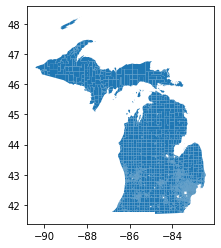

In [228]:
join = gpd.GeoDataFrame(pd.merge(df_for_join, shp, on = 'unique_id', how = 'inner').drop_duplicates(), crs = crs)
join.plot()

In [229]:
join.shape

(4595, 31)

# Validation

## Shapefile

In [230]:
shp_final_merge = pd.merge(join, gdfv, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'])

In [231]:
join['geometry'].geom_almost_equals(gdfv['geometry'], decimal = 0)

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0       False
1       False
2       False
3       False
4       False
        ...  
4805    False
4806    False
4807    False
4808    False
4809    False
Length: 4810, dtype: bool

In [232]:
shp_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_x')
final_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_y')
vals = shp_shapes.geom_almost_equals(final_shapes, decimal = 0)

In [233]:
print(vals.value_counts())

True     4557
False     253
dtype: int64


In [235]:
print(shp_final_merge[~vals]['unique_id'].str[0:3].value_counts())
diff_precincts = gpd.GeoDataFrame(shp_final_merge[~vals], geometry = 'geometry_x', crs = crs)

shp_difference = gpd.overlay(shp_shapes, final_shapes, how = 'symmetric_difference')
shp_difference.plot()

163    44
149     5
033     4
049     3
139     3
115     2
045     2
029     2
081     2
093     2
161     2
035     2
017     1
147     1
087     1
105     1
037     1
015     1
065     1
023     1
067     1
025     1
131     1
005     1
057     1
125     1
027     1
091     1
041     1
Name: unique_id, dtype: int64


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -86.643751321693912 46.410620532768398 at -86.643751321693912 46.410620532768398


TopologicalError: The operation 'GEOSDifference_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x7f7f43434580>

# Election result difference

In [278]:
gdfv.columns

Index(['VTD2016', 'Label', 'G16PREDCli', 'G16PRERTru', 'G16PREGSte',
       'G16PRELJoh', 'G16PREOth', 'geometry', 'join_tst1', 'county_fips',
       'vtd2016_nowards', 'unique_id'],
      dtype='object')

In [236]:
column_list = ['G16PRERTru', 'G16PREGSte','G16PRELJoh', 'G16PREOth']

In [237]:
final_df_merge = pd.merge(join, gdfv, on = 'unique_id', how = 'inner', suffixes = ('_x', '_y'))

In [238]:
final_df_merge.shape

(4595, 42)

In [239]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['unique_id'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
                    print("New max diff is: ", str(max_diff))
                    print('% difference from VEST total is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['unique_id'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['unique_id'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()


In [240]:
validater_row(final_df_merge, column_list)

New max diff is:  1.0
% difference from VEST total is:  16.666666666666664
00101040001
New max diff is:  2.0
% difference from VEST total is:  100.0
00701760005
New max diff is:  26.0
% difference from VEST total is:  5.949656750572083
02712620001
New max diff is:  43.0
% difference from VEST total is:  5.850340136054422
02739480001
New max diff is:  46.0
% difference from VEST total is:  5.859872611464969
02741600001
New max diff is:  67.0
% difference from VEST total is:  5.939716312056738
02754460001
New max diff is:  492.0
% difference from VEST total is:  38.67924528301887
02760900001
There are  4595  total rows
2683  of these rows have election result differences
1912  of these rows are the same

The max difference between any one shared column in a row is:  492.0
The average difference is:  5.338659793814433
There are  197 precinct results with a difference greater than 5


In [243]:
df_for_join[['G16PREDCli', 'G16PRERTru', 'G16PREGSte','G16PRELJoh', 'G16PREOth']][df_for_join['unique_id'] == '02760900001']

,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth
74,366.0,625.0,8.0,38.0,0.0


In [245]:
gdfv[gdfv['unique_id'] == '02760900001']

,VTD2016,Label,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PREOth,geometry,join_tst1,county_fips,vtd2016_nowards,unique_id
416,0276090000001,Ontwa Township,539,1272,20,79,15,"POLYGON ((-86.04468 41.81071, -86.04469 41.807...",02760900001,027,02760900001,02760900001


### TODO:
- [x]reallocate AVCBs and statistical adjustments according to precinct share of county total
    - NOTE large difference for other votes likely caused by statistical adjustments - read documentation more carefully and adapt
    - "Most counties had "statistical adjustments" that were at the county level, rather than the precinct level. Only two were for party candidates (Huron and Kalkaka), and in those cases, two or fewer votes. The remaining cases were related to "other" votes. Due to the scattered nature of "other" votes, these votes are apportioned to precincts by the split of total votes of precincts within the county.  "

- [x]compare wards - make new unique id with wards only
- [x]Fenton and Richmond - merge votes.. ? - in two cases - pick out using sorted technique from adriana
- [x]retrace, find where unique id got messed up
- [ ]identify why vote totals are so off
- re-run validation
- write report

**Questions**
- AVCBs - maybe dont need to be -900 even though all just reallocated by county?? also don't need the derek willis file?? why did vest mention in documentation?
- what is wrong with the other vote columns? statistical adjustments problem?

three digit county FIPs code + “-” + five digit MCD/juris FIPs code + two digit ward code + 3 digit precinct code Ex: WP-001-01040-00001 Lily Falk to Everyone (11:53 AM) Three digit county FIPs code + “-” + City/Town Name + “-” + one digit ward code + “-0” + three digit precinct code Ex: 001-ALCONA TOWNSHIP-0-0001

In 2018 file ward was given, here in 2016, not given.

- Peter tries some unique id then take what joins off of that
- if incorrect join it will come up later when you compare precinct by precinct election results
- for stuff that does not join, export to csv and look at that - manually line up
- map unique ids from one to the other to match
- rerunning the join - then left with the stuff where you have no idea where it is coming from
- if there are no unique ids at all, but you are able to 
